<a href="https://colab.research.google.com/github/Suba-0408/Communify/blob/main/demosignlanguage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
dataset_path = "/content/drive/MyDrive/ISL/images for phrases/images for phrases"


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

num_classes = len(train_generator.class_indices)
print("Number of classes:", num_classes)
print("Classes:", train_generator.class_indices)

Found 1408 images belonging to 44 classes.
Found 352 images belonging to 44 classes.
Number of classes: 44
Classes: {'again': 0, 'agree': 1, 'answer': 2, 'attendance': 3, 'book': 4, 'break': 5, 'careful': 6, 'change': 7, 'chat': 8, 'congratulations': 9, 'email': 10, 'file': 11, 'good morning': 12, 'happy birthday': 13, 'home': 14, 'how are you': 15, 'hungry': 16, 'i need help': 17, 'join': 18, 'keepsmile': 19, 'meet': 20, 'mistake': 21, 'open': 22, 'opinion': 23, 'pass': 24, 'please': 25, 'practice': 26, 'pressure': 27, 'problem': 28, 'questions': 29, 'remember': 30, 'seat': 31, 'shift': 32, 'sick': 33, 'stop': 34, 'sun': 35, 'team': 36, 'thirsty': 37, 'this': 38, 'together': 39, 'understand': 40, 'wait': 41, 'where': 42, 'write': 43}


In [4]:

from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()




/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 44)             │         5,676 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,310,316 (12.63 MB)

 Trainable params: 3,310,316 (12.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

num_classes = len(train_generator.class_indices)
print("Number of classes:", num_classes)
print("Classes:", train_generator.class_indices)


Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Number of classes: 1
Classes: {'images for phrases': 0}


In [5]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 639s 14s/step - accuracy: 0.0814 - loss: 3.6479 - val_accuracy: 0.7557 - val_loss: 1.2491
Epoch 2/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.6735 - loss: 1.1334 - val_accuracy: 0.9460 - val_loss: 0.2109
Epoch 3/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.8874 - loss: 0.3416 - val_accuracy: 0.9602 - val_loss: 0.1489
Epoch 4/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9429 - loss: 0.2030 - val_accuracy: 0.9631 - val_loss: 0.1689
Epoch 5/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9382 - loss: 0.1566 - val_accuracy: 0.9773 - val_loss: 0.1262
Epoch 6/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9670 - loss: 0.1091 - val_accuracy: 0.9830 - val_loss: 0.1239
Epoch 7/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9370 - loss: 0.1851 - val_accuracy: 0.9801 - val_loss: 0.1311
Epoch 8/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9623 - loss: 0.0931 - val_accuracy: 0.9801 - val_los

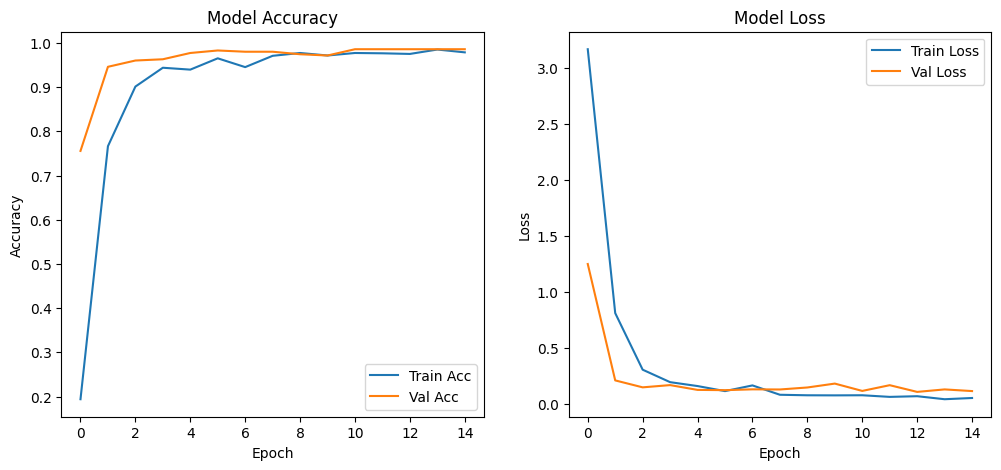

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [7]:
model.save("/content/drive/MyDrive/ISL/isl_sign_model.keras")
print("✅ Model saved as isl_sign_model.keras")

✅ Model saved as isl_sign_model.keras


In [9]:
class_labels = list(train_generator.class_indices.keys())
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128,128))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)  # batch dimension

    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction)

    print(f"Predicted: {predicted_class} (Confidence: {confidence:.2f})")
    return predicted_class

# Example: test with one of your images
test_img = "/content/drive/MyDrive/ISL/images for phrases/images for phrases/good morning/3.png"
predicted_text = predict_image(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted: good morning (Confidence: 1.00)


In [10]:
!pip install gTTS
from gtts import gTTS
import IPython.display as ipd

def speak(text):
    tts = gTTS(text=text, lang='en')
    tts.save("output.mp3")
    return ipd.Audio("output.mp3")

# Speak the predicted class
audio = speak(predicted_text)
display(audio)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.2.1
    Uninstalling click-8.2.1:
      Successfully uninstalled click-8.2.1
